In [ ]:
!git clone https://github.com/udacity/machine-learning/

Cloning into 'machine-learning'...
remote: Enumerating objects: 1967, done.
remote: Total 1967 (delta 0), reused 0 (delta 0), pack-reused 1967
Receiving objects: 100% (1967/1967), 35.44 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (1079/1079), done.


In [ ]:
!mv machine-learning/projects/boston_housing/housing.csv housing.csv

In [ ]:
!mv machine-learning/projects/boston_housing/visuals.py visuals.py

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import visuals as vs

In [ ]:
data=pd.read_csv('/content/housing.csv')
prices=data['MEDV']
features=data.drop('MEDV',axis=1)
print("Boston Housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston Housing dataset has 489 data points with 4 variables each.


In [ ]:
data[:10]

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [ ]:
features

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [ ]:
prices

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [ ]:
minimum_price=np.amin(prices)
maximum_price=np.amax(prices)
mean_price=np.mean(prices)
median_price=np.median(prices)
std_price=np.std(prices)

print("Statistics for Boston Housing Dataset:\n")
print("Min Price: ${:,.2f}".format(minimum_price))
print("Max price: ${:,.2f}".format(maximum_price))
print("Mean Price: ${:,.2f}".format(mean_price))
print("Median Price: ${:,.2f}".format(median_price))
print("Std price: ${:,.2f}".format(std_price))

Statistics for Boston Housing Dataset:

Min Price: $105,000.00
Max price: $1,024,800.00
Mean Price: $454,342.94
Median Price: $438,900.00
Std price: $165,171.13


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
def performance_metric(y_true,y_predict):
  score=r2_score(y_true,y_predict)
  return score

In [ ]:
score=performance_metric([3,-0.5,2,7,4.2],[2.5,0.0,2.1,7.8,5.3])
print("Model has a coefficient of determination R^2 of {:.3f}".format(score))

Model has a coefficient of determination R^2 of 0.923


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_test,y_train,y_test=tts(features,prices,test_size=.20,random_state=40)
print("Training and Testing split was successful")

Training and Testing split was successful


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

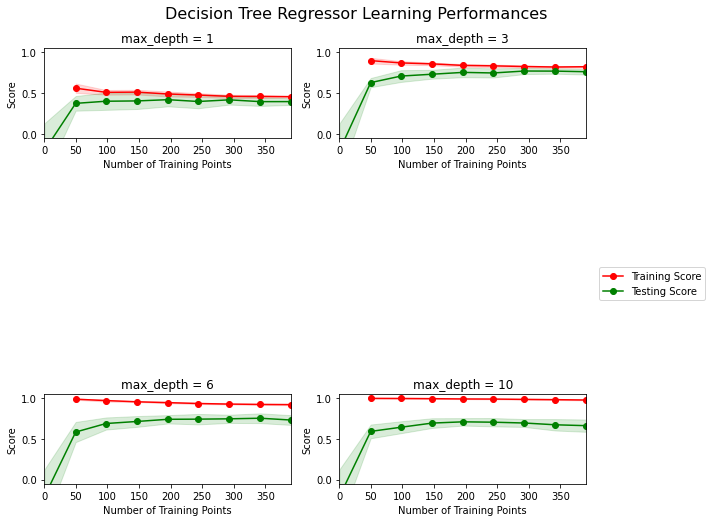

In [ ]:
vs.ModelLearning(features,prices)

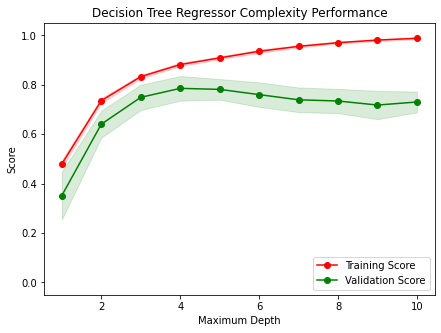

In [ ]:
vs.ModelComplexity(X_train,y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [ ]:
def fit_model(X,y):
  cv_sets=ShuffleSplit(X.shape[0],test_size=0.20,random_state=0)
  regressor=DecisionTreeRegressor()
  params={'max_depth': range(1,11)}
  scoring_fnc=make_scorer(performance_metric)
  grid=GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)
  grid=grid.fit(X,y)
  return grid.best_estimator_

In [ ]:
reg=fit_model(X_train,y_train)
print("Parameter max_depth is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter max_depth is 4 for the optimal model.


In [ ]:
client_data=[[5,17,15],
             [4,32,22],
             [8,3,12]]

for i,price in enumerate(reg.predict(client_data)):
  print("Predicted selling price for Client {}'s Home: $ {:,.2f}".format(i+1,price))    

Predicted selling price for Client 1's Home: $ 411,096.00
Predicted selling price for Client 2's Home: $ 219,961.54
Predicted selling price for Client 3's Home: $ 921,900.00


In [ ]:
vs.PredictTrials(features,prices,fit_model,client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89
